# Introduction to Machine Learning - Fall 2022

---

## Computer Assignment 1 <br>
Instructor: Sajjad Amini <br>
Assistant: Kiarash Vaziri <br>

---



# *💰 Bitcoin Market Summary*

In [3]:
# PACKAGES
import math
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size':18})

C:\Users\OST\AppData\Local\Temp\ipykernel_5124\4211670106.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


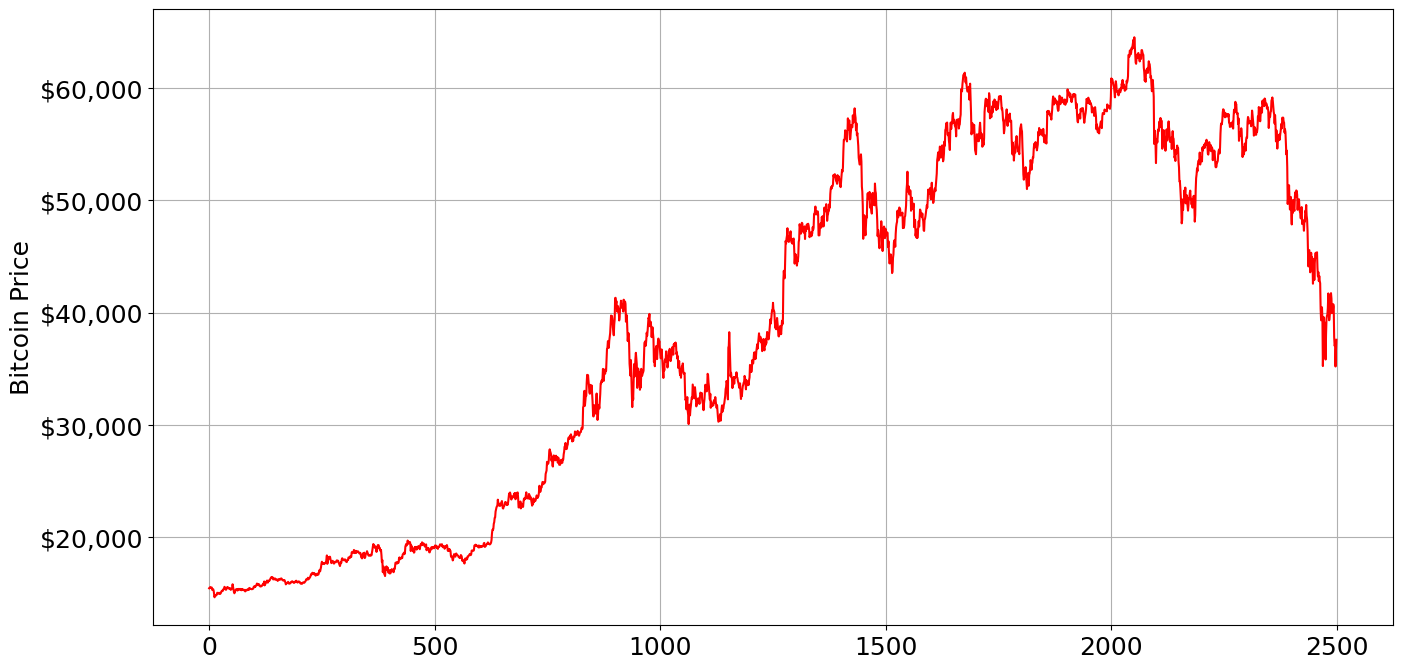

In [4]:
# Plot market summary of bitcoin
btc_price = np.load("btc_price.npy")
plt.plot(btc_price, color='red', lw=1.5)
plt.ylabel('Bitcoin Price')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])
plt.grid()
plt.show()

In [25]:
%matplotlib inline
# DENOISING THE PRICE TAGS
# Write your code here
def D_matrix(n):
    D = np.matrix(np.eye(n - 1, n))
    for i in range(0, n-1):
        D[i, i+1] = -1
    return D

def denoise():
    samples=np.array(range(0,2500))
    D=D_matrix(len(samples))
    in_put=btc_price.copy()
    plt.plot(samples,in_put,'-r, ms=2.5)
    for lam in [1,50,500,1000,3000]:
        fit = np.linalg.lstsq(np.eye(D.shape[1], D.shape[1])+lam * np.dot(np.transpose(D),D),in_put)[0]
        plt.plot(samples,fit,'-',label='$\lambda =$'+str(lam),color='r')
        plt.legend(loc=2)
        
        plt.plot(btc_price, color='k', lw=1.5)
        plt.ylabel('Bitcoin Price')
        current_values = plt.gca().get_yticks()
        plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])
        plt.grid()
        
        plt.show()


C:\Users\OST\AppData\Local\Temp\ipykernel_5124\4029800236.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  fit = np.linalg.lstsq(np.eye(D.shape[1], D.shape[1])+lam * np.dot(np.transpose(D),D),in_put)[0]
C:\Users\OST\AppData\Local\Temp\ipykernel_5124\4029800236.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


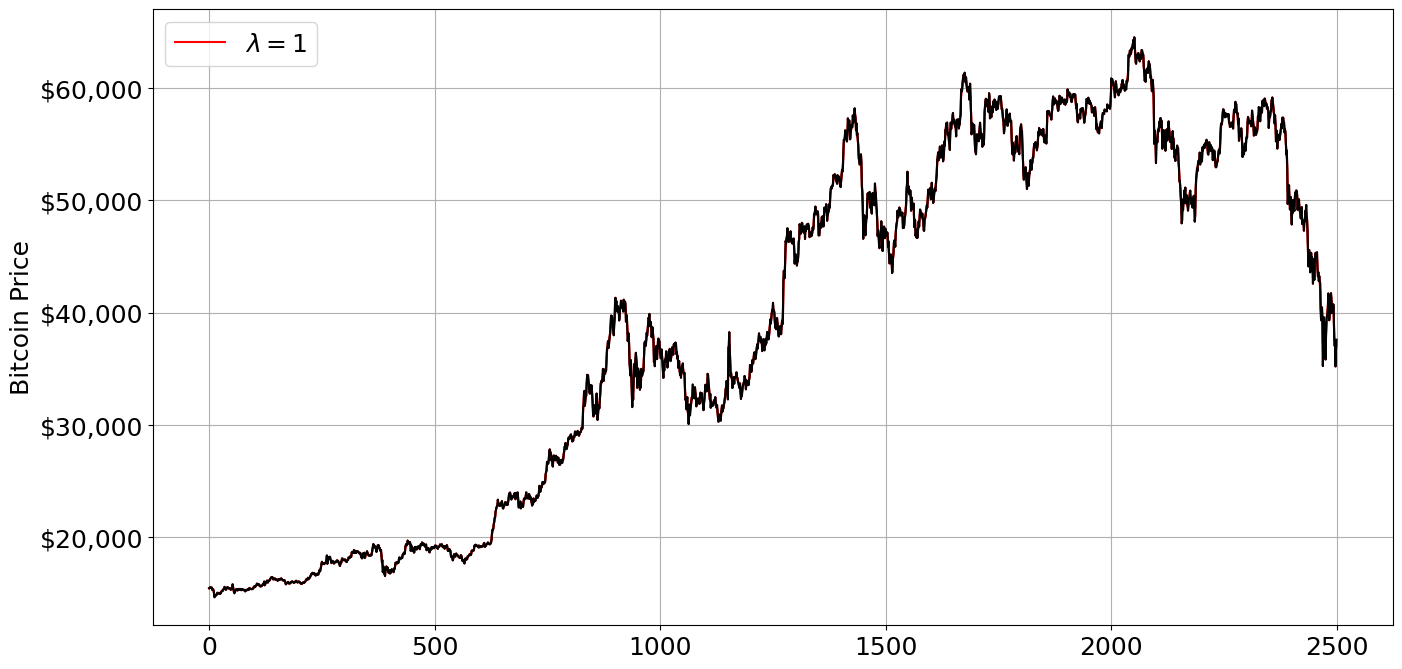

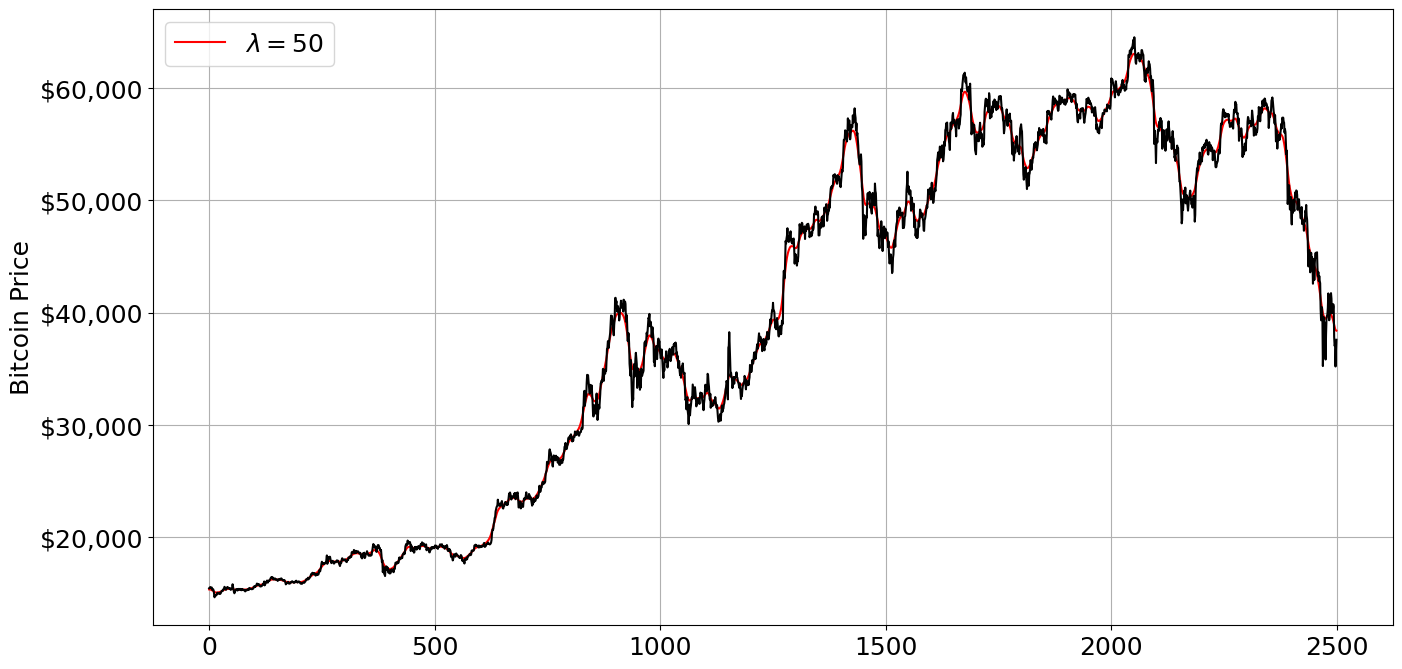

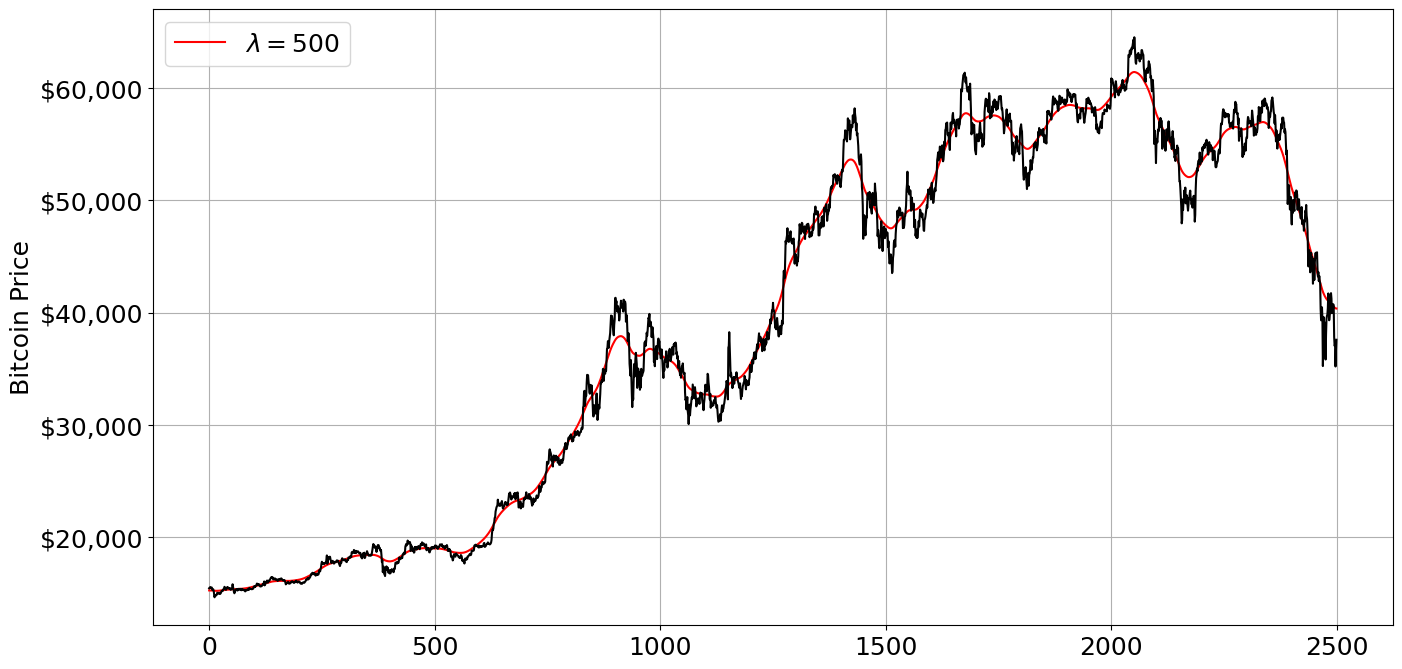

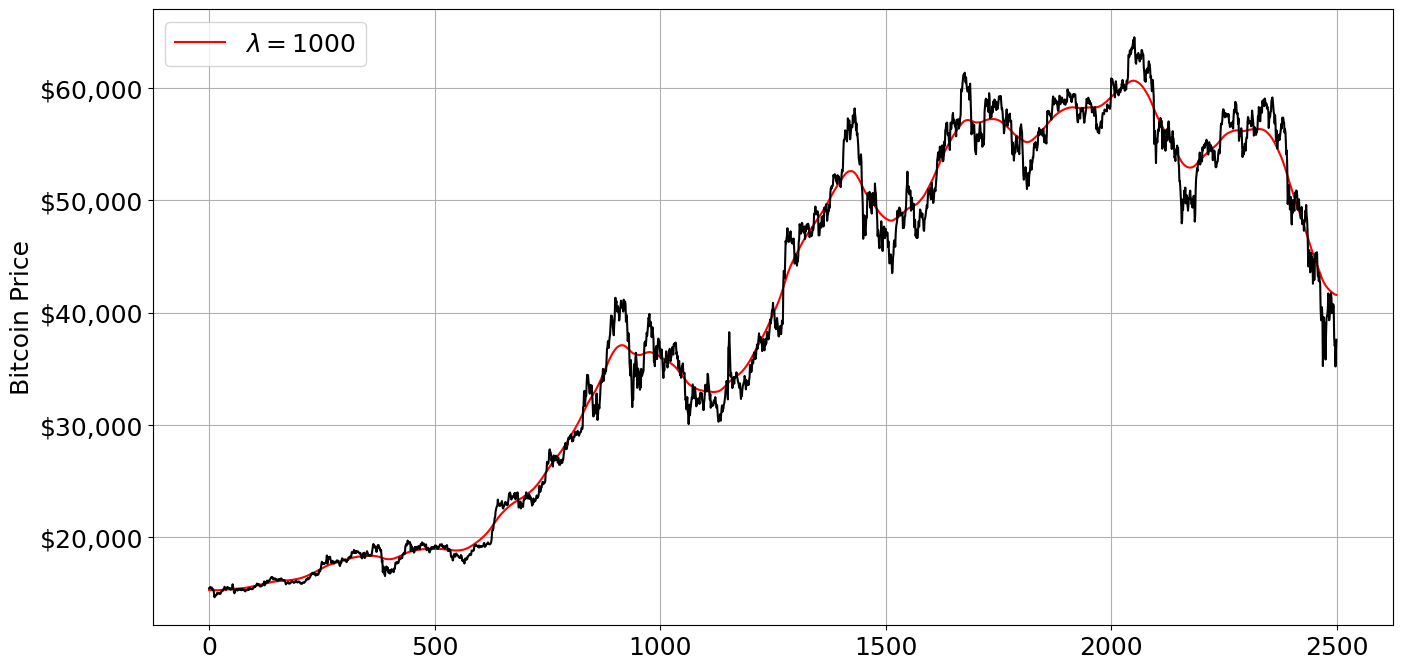

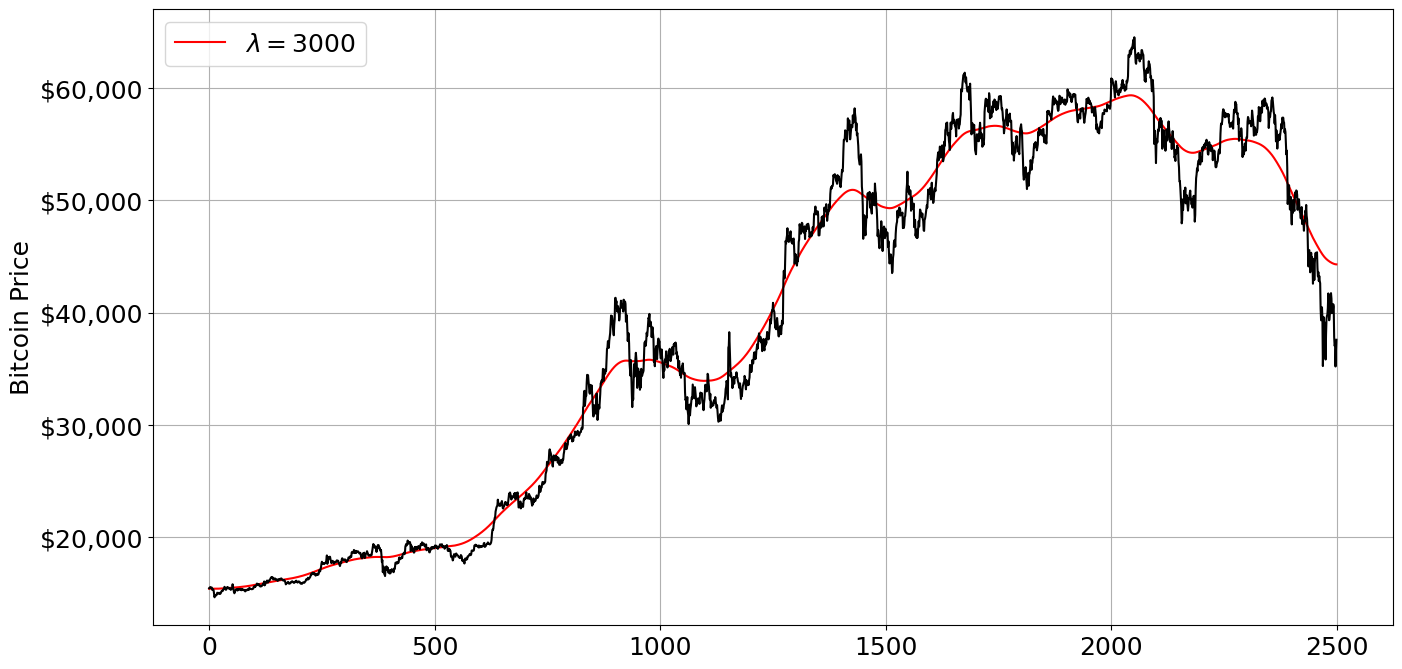

In [26]:
denoise()

How does the parameter $\lambda$ change the plots?<br>
For which value of $\lambda$ the data looks more realistic (denoised)?

---
Answer:
we have smoother plot(lower variance) with bigger $\lambda$,there we plot with 5 values of $\lambda$.
The plot with  $\lambda$=500 is more realistic.
I used this website for this coding http://www.nbertagnolli.com/jekyll/update/2015/12/12/Opt_Noise_Reduction.html

# *🛥️ Hutchinson*


In [ ]:
# PACKAGES
import matplotlib.pyplot as plt
import numpy as np
!pip install tqdm
from tqdm import tqdm 

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size':18})

In [ ]:
def hutchinson1(A, m):
    """
      Hutchinson's estimator.
      Args:
          A: target symmetric matrix, size n x n
          m: # standard normal random vectors 
      Returns: estimated trace
    """
    # Write your code here


    return tr

def hutchinson2(A, m):
    """
    Hutchinson's estimator.
    Args:
        A: target symmetric matrix, size n x n
        m: # random sign vectors 
    Returns: estimated trace
    """
    # Write your code here
    

    return tr    

In [ ]:
def relative_error(true, est):
  return np.abs((est-true)/true)

In [ ]:
# Test and evalutate the estimators
# DO NOT CHANGE ANYTHING IN THIS CELL
num_test = 500
errors1 = []
errors2 = []

m = 10000

for i in tqdm(range(num_test), desc='Running tests'):
    n = np.random.randint(10, 15)
    A = np.random.randn(n,n)
    A = (A + A.transpose()) / 2
    tr_est1 = hutchinson1(A, m)
    tr_est2 = hutchinson2(A, m)
    tr_true = np.trace(A)
    errors1.append(relative_error(tr_true, tr_est1))
    errors2.append(relative_error(tr_true, tr_est2))

# Report the errors statistically
print(f"Random vectors: standard normal, m={m}:")
print(f"Relative error = {np.mean(errors1)} +- {np.std(errors1)}")

print(f"Random vectors: sign, m={m}:")
print(f"Relative error = {np.mean(errors2)} +- {np.std(errors2)}")

In [ ]:
# Plot the histograms
# You can use pandas and/or seaborn libraries

# Write your code here
